### OSCR Machine Learning in Python

**Linear Regression Module**

**&copy; Kaixin Wang**, Fall 2019



Module/Package import

In [1]:
import numpy as np # numpy module for linear algebra
import pandas as pd # pandas module for data manipulation
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting

In [2]:
import warnings # to handle warning messages
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression # package for linear model
import statsmodels.api as sm # another package for linear model
import statsmodels.formula.api as smf
import scipy as sp

In [4]:
from sklearn.model_selection import train_test_split # split data into training and testing sets

Dataset import

The dataset that we will be using is the `meuse` dataset.

As described by the author of the data: "This data set gives locations and topsoil heavy metal concentrations, along with a number of soil and landscape variables at the observation locations, collected in a flood plain of the river Meuse, near the village of Stein (NL). Heavy metal concentrations are from composite samples of an area of approximately 15 m $\times$ 15 m."

In [5]:
soil = pd.read_csv("soil.csv")  # data import
soil.head() # check if read in correctly

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,11.7,85,299,1022,7.909,0.001358,13.6,1,1,1,Ah,50
1,181025,333558,8.6,81,277,1141,6.983,0.012224,14.0,1,1,1,Ah,30
2,181165,333537,6.5,68,199,640,7.800,0.103029,13.0,1,1,1,Ah,150
3,181298,333484,2.6,81,116,257,7.655,0.190094,8.0,1,2,0,Ga,270
4,181307,333330,2.8,48,117,269,7.480,0.277090,8.7,1,2,0,Ah,380


In [6]:
soil.shape # rows x columns

(155, 14)

In [7]:
print(soil.describe())

                   x              y     cadmium      copper        lead  \
count     155.000000     155.000000  155.000000  155.000000  155.000000   
mean   180004.600000  331634.935484    3.245806   40.316129  153.361290   
std       746.039775    1047.746801    3.523746   23.680436  111.320054   
min    178605.000000  329714.000000    0.200000   14.000000   37.000000   
25%    179371.000000  330762.000000    0.800000   23.000000   72.500000   
50%    179991.000000  331633.000000    2.100000   31.000000  123.000000   
75%    180629.500000  332463.000000    3.850000   49.500000  207.000000   
max    181390.000000  333611.000000   18.100000  128.000000  654.000000   

              zinc        elev        dist          om       ffreq  \
count   155.000000  155.000000  155.000000  153.000000  155.000000   
mean    469.716129    8.165394    0.240017    7.478431    1.606452   
std     367.073788    1.058657    0.197702    3.432966    0.734111   
min     113.000000    5.180000    0.000000  

In [8]:
index = pd.isnull(soil).any(axis = 1)
soil = soil[-index]
soil = soil.reset_index(drop = True)

In [9]:
soil.shape

(152, 14)

In [10]:
n = soil.shape[1]

#### Exploratory Data Analysis (EDA)

    1. Correlation Heatmap

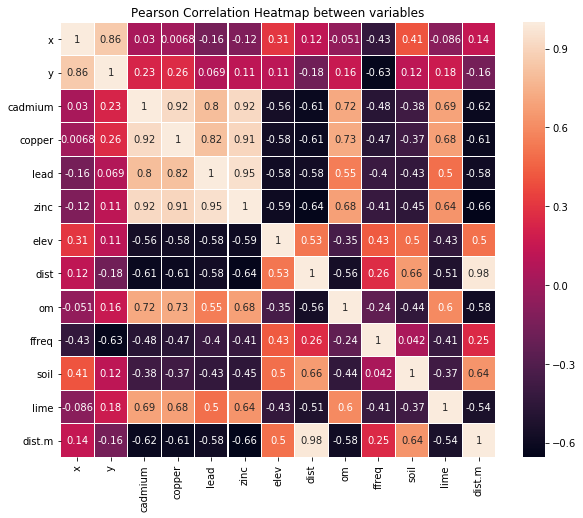

In [11]:
plt.figure(figsize = (10, 8))
sns.heatmap(soil.corr(), annot = True, square = True, linewidths = 0.1)
plt.ylim(n-1, 0)
plt.xlim(0, n-1)
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

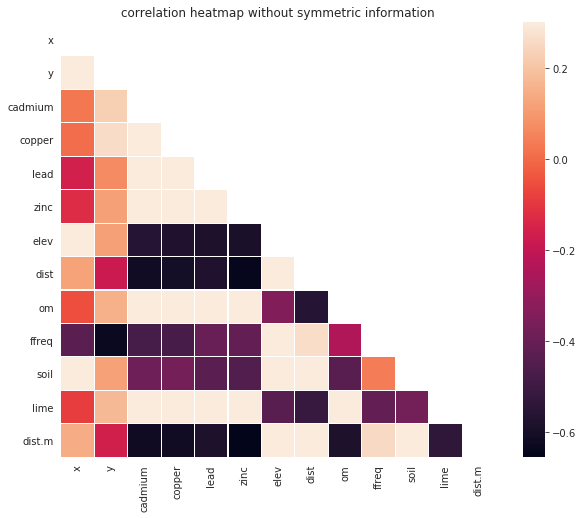

In [12]:
plt.figure(figsize = (10, 8))
corr = soil.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, linewidths = 0.1, vmax = .3, square = True)
plt.ylim(n-1, 0)
plt.xlim(0, n-1)
plt.title("correlation heatmap without symmetric information")
plt.show()

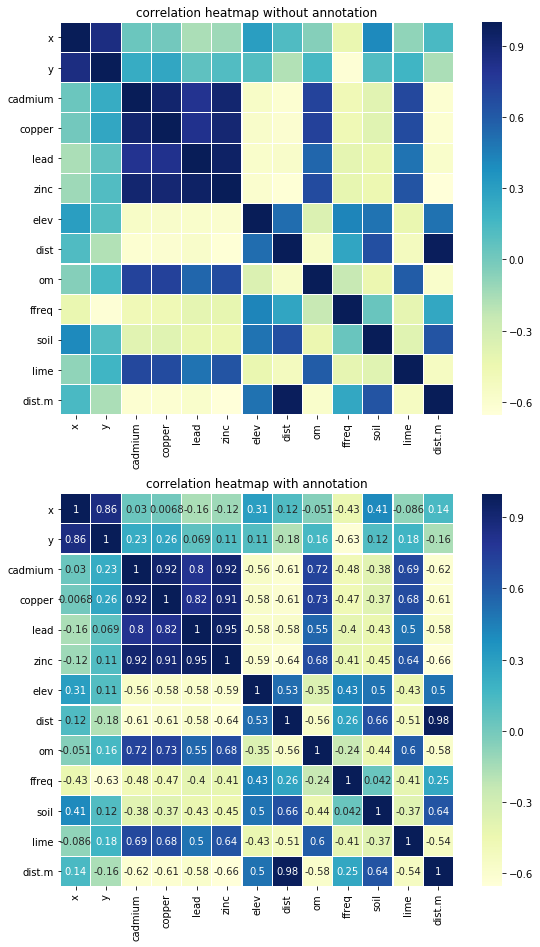

In [13]:
fig, axs = plt.subplots(figsize = (8, 12))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap without annotation
sns.heatmap(soil.corr(), linewidths = 0.1, square = True, cmap = "YlGnBu")
plt.ylim(n-1, 0)
plt.xlim(0, n-1)
plt.title("correlation heatmap without annotation")
plt.subplot(2, 1, 2)
# correlation heatmap with annotation
sns.heatmap(soil.corr(), linewidths = 0.1, square = True, annot = True, cmap = "YlGnBu")
plt.ylim(n-1, 0)
plt.xlim(0, n-1)
plt.title("correlation heatmap with annotation")
plt.show()

     2. Boxplots

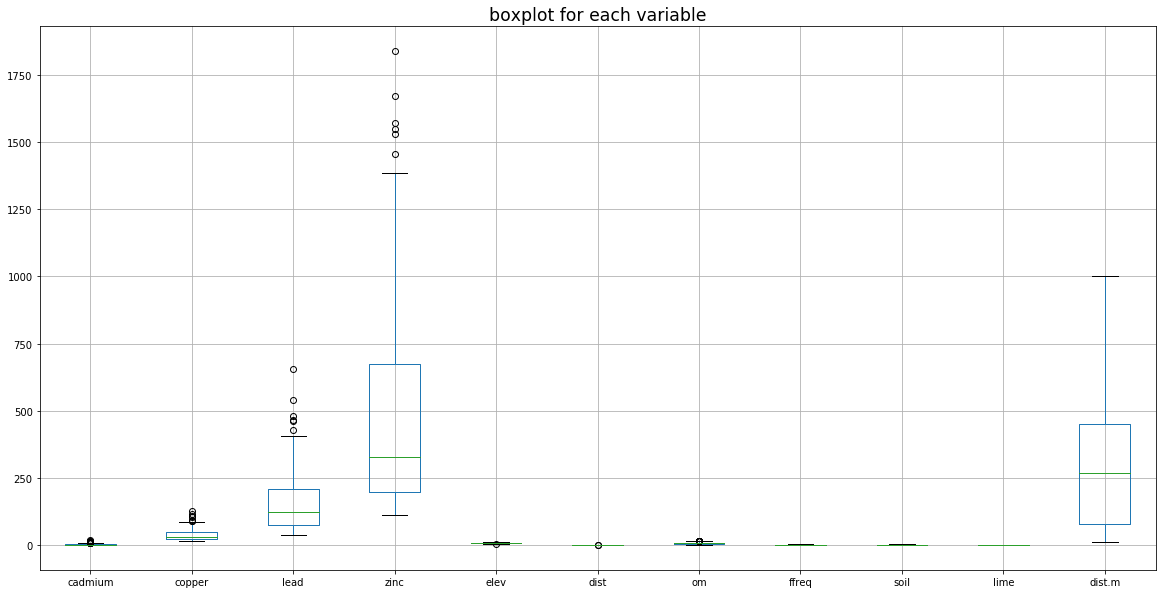

In [14]:
plt.figure(figsize = (20, 10))
soil.iloc[:, 2:].boxplot()
# soil.iloc[:, 2:].plot(kind = "box")  # 2nd method
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

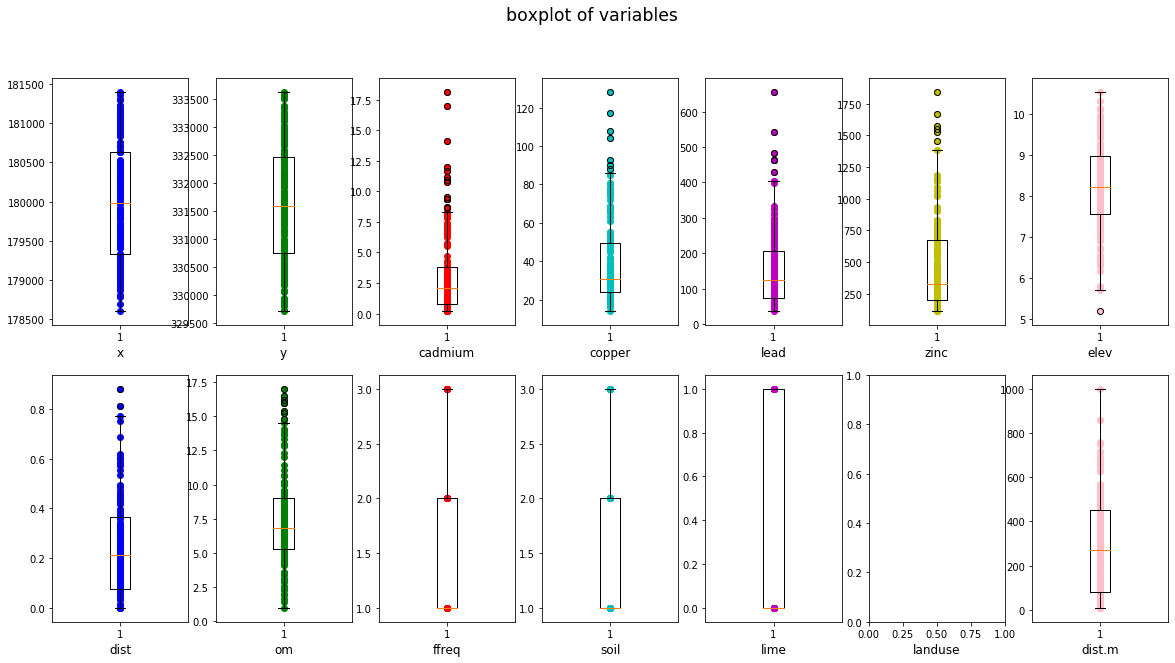

In [15]:
fig, axs = plt.subplots(2, int(n/2), figsize = (20, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink']  # to set color

for i, var in enumerate(soil.columns.values):
    if var == "landuse":
        axs[1, i-int(n/2)].set_xlabel(var, fontsize = 'large')
        continue
    if i < int(n/2):
        axs[0, i].boxplot(soil[var])
        axs[0, i].set_xlabel(var, fontsize = 'large')
        axs[0, i].scatter(x = np.tile(1, soil.shape[0]), y = soil[var], color = colors[i])
    else:
        axs[1, i-int(n/2)].boxplot(soil[var])
        axs[1, i-int(n/2)].set_xlabel(var, fontsize = 'large')
        axs[1, i-int(n/2)].scatter(x = np.tile(1, soil.shape[0]), y = soil[var], 
                                   color = colors[i-int(n/2)])
        
plt.suptitle("boxplot of variables", fontsize = 'xx-large')
plt.show()

    3. scatterplots

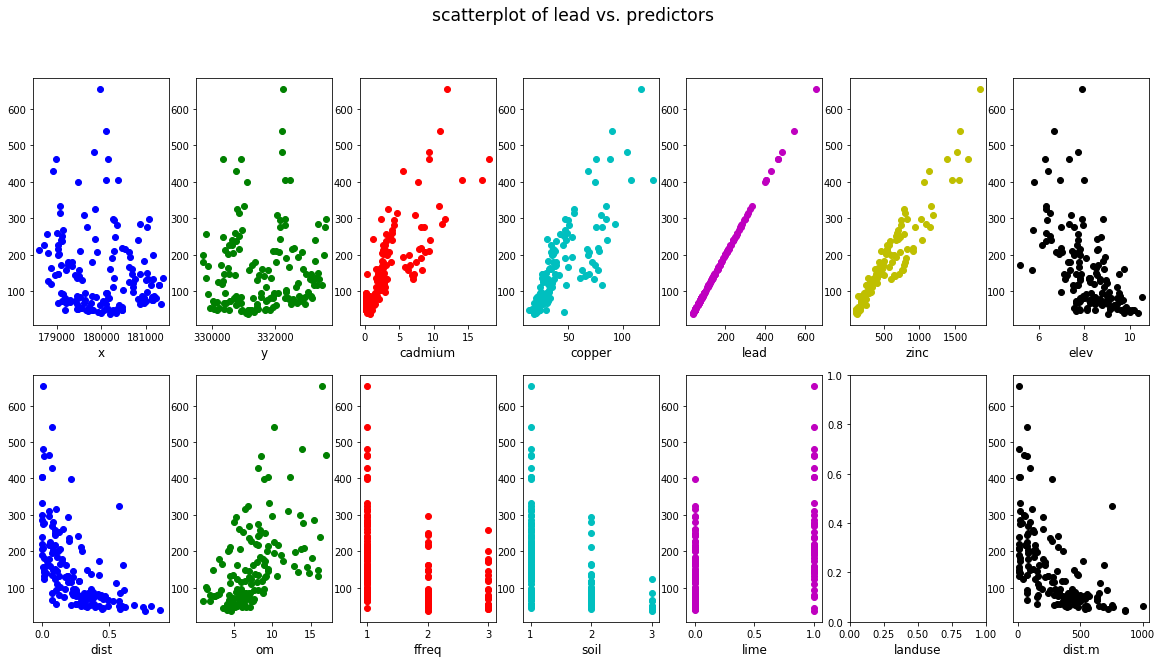

In [16]:
fig, axs = plt.subplots(2, int(n/2), figsize = (20, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # to set color

for i, var in enumerate(soil.columns.values):
    if var == "landuse":
        axs[1, i-int(n/2)].set_xlabel(var, fontsize = 'large')
        continue
    if i < int(n/2):
        axs[0, i].scatter(soil[var], soil["lead"], color = colors[i])
        axs[0, i].set_xlabel(var, fontsize = 'large')
    else:
        axs[1, i-int(n/2)].scatter(soil[var], soil["lead"], color = colors[i-int(n/2)])
        axs[1, i-int(n/2)].set_xlabel(var, fontsize = 'large')
        
plt.suptitle("scatterplot of lead vs. predictors", fontsize = 'xx-large')
plt.show()

    4. histograms and density plots

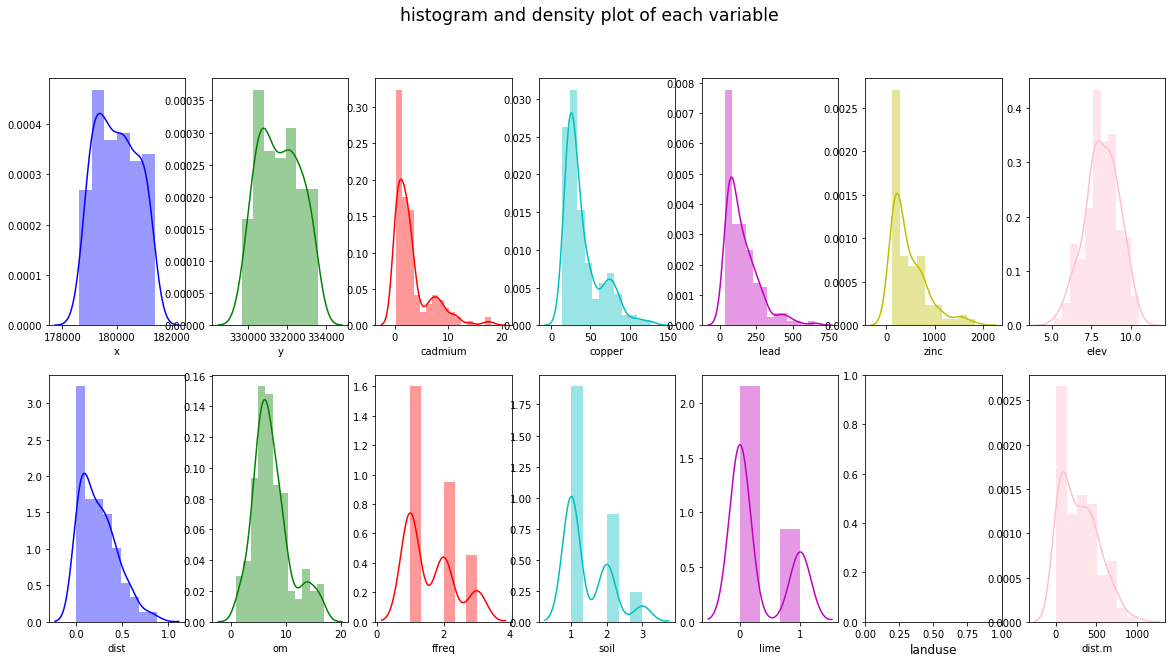

In [17]:
fig, axs = plt.subplots(2, int(n/2), figsize = (20, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink']  # to set color

for i, var in enumerate(soil.columns.values):
    if var == "landuse":
        axs[1, i-int(n/2)].set_xlabel(var, fontsize = 'large')
        continue
    if i < int(n/2):
        sns.distplot(soil[var], color = colors[i], ax = axs[0, i])
    else:
        sns.distplot(soil[var], color = colors[i-int(n/2)], ax = axs[1, i-int(n/2)])
        
plt.suptitle("histogram and density plot of each variable", fontsize = 'xx-large')
plt.show()

Reference:

Dataset: `meuse` dataset

- P.A. Burrough, R.A. McDonnell, 1998. Principles of Geographical Information Systems. Oxford University Press.
- Stichting voor Bodemkartering (STIBOKA), 1970. Bodemkaart van Nederland : Blad 59 Peer, Blad 60 West en 60 Oost Sittard: schaal 1 : 50 000. Wageningen, STIBOKA.

To access this dataset in `R`:

```
install.packages("sp")
library(sp)
data(meuse)
```

**&copy; Kaixin Wang**, updated October 2019